In [1]:
import pandas as pd
import os

# Directory path where the CSV files are located
directory = "C:/Users/cdub4/Downloads/"

# List of all CSV filenames
filenames = [
    "bp_without_sth_bucket.csv",
    "lost1_without_sth_bucket.csv",
    "lost2_without_sth_bucket.csv",
    "lost3_without_sth_bucket.csv",
    "lost4_without_sth_bucket.csv",
    "lost5_without_sth_bucket.csv",
    "sth_without_sth_bucket.csv",
    "stnl_without_sth_bucket.csv"
]

# Read each CSV into a dictionary of DataFrames
dataframes = {}
for filename in filenames:
    filepath = os.path.join(directory, filename)
    df = pd.read_csv(filepath)
    dataframes[filename] = df
    print(f"Loaded {filename} with shape {df.shape}")

# After reading all files, combine the "lost1" to "lost5" DataFrames:
lost_files = [
    "lost1_without_sth_bucket.csv",
    "lost2_without_sth_bucket.csv",
    "lost3_without_sth_bucket.csv",
    "lost4_without_sth_bucket.csv",
    "lost5_without_sth_bucket.csv"
]

# Retrieve the DataFrames corresponding to lost files and concatenate them
lost_dfs = [dataframes[file] for file in lost_files]
combined_lost_df = pd.concat(lost_dfs, ignore_index=True)
print("Combined lost files DataFrame shape:", combined_lost_df.shape)


Loaded bp_without_sth_bucket.csv with shape (1500, 38)
Loaded lost1_without_sth_bucket.csv with shape (9295, 38)
Loaded lost2_without_sth_bucket.csv with shape (9284, 38)
Loaded lost3_without_sth_bucket.csv with shape (9277, 38)
Loaded lost4_without_sth_bucket.csv with shape (9287, 38)
Loaded lost5_without_sth_bucket.csv with shape (9132, 38)
Loaded sth_without_sth_bucket.csv with shape (493, 35)
Loaded stnl_without_sth_bucket.csv with shape (12000, 38)
Combined lost files DataFrame shape: (46275, 38)


In [3]:
import pandas as pd
import os

# Directory path where the CSV files are located
directory = "C:/Users/cdub4/Downloads/"

# List of filenames for each group
filenames = {
    "bp": ["bp_without_sth_bucket.csv"],
    "lost": [
        "lost1_without_sth_bucket.csv",
        "lost2_without_sth_bucket.csv",
        "lost3_without_sth_bucket.csv",
        "lost4_without_sth_bucket.csv",
        "lost5_without_sth_bucket.csv"
    ],
    "sth": ["sth_without_sth_bucket.csv"],
    "stnl": ["stnl_without_sth_bucket.csv"]
}

# Define the columns for which to calculate averages
avg_columns = [
    'AVG_TIME_DAYS_purchase',
    '0-200_purchase',
    '200-800_purchase',
    '800+_purchase',
    'no_purchase',
    'percent_open',
    'percent_click'
]

# Load DataFrames and combine where needed
group_dfs = {}

# Loop through each group, read the corresponding files, and combine them (if more than one file)
for group, files in filenames.items():
    dfs = []
    for file in files:
        filepath = os.path.join(directory, file)
        df = pd.read_csv(filepath)
        dfs.append(df)
        print(f"Loaded {file} for group {group} with shape {df.shape}")
    # If there is more than one file in the group, concatenate them
    if len(dfs) > 1:
        group_df = pd.concat(dfs, ignore_index=True)
    else:
        group_df = dfs[0]
    group_dfs[group] = group_df

# Compute the average for the specified columns for each group
group_averages = {}

for group, df in group_dfs.items():
    # Ensure the columns are numeric for averaging (if needed, convert or handle errors)
    group_avg = df[avg_columns].apply(pd.to_numeric, errors='coerce').mean()
    group_averages[group] = group_avg

# Convert the result into a DataFrame for a cleaner display (each group as a row)
result_df = pd.DataFrame(group_averages).T
print("\nAverages for each group:")
print(result_df)


Loaded bp_without_sth_bucket.csv for group bp with shape (1500, 38)
Loaded lost1_without_sth_bucket.csv for group lost with shape (9295, 38)
Loaded lost2_without_sth_bucket.csv for group lost with shape (9284, 38)
Loaded lost3_without_sth_bucket.csv for group lost with shape (9277, 38)
Loaded lost4_without_sth_bucket.csv for group lost with shape (9287, 38)
Loaded lost5_without_sth_bucket.csv for group lost with shape (9132, 38)
Loaded sth_without_sth_bucket.csv for group sth with shape (493, 35)
Loaded stnl_without_sth_bucket.csv for group stnl with shape (12000, 38)

Averages for each group:
      AVG_TIME_DAYS_purchase  0-200_purchase  200-800_purchase  800+_purchase  \
bp                280.282086        0.249333          0.344667       0.403333   
lost              194.952263        0.020076          0.036067       0.119049   
sth               212.291176        0.271805          0.225152       0.192698   
stnl              254.870609        0.181750          0.255083       0.5524

Purchase Data Analysis Summary:
           AVG_TIME_DAYS_purchase  0-200_purchase  200-800_purchase  \
Group                                                                 
stnl                   254.870609        0.181750          0.255083   
stnl_lost              194.952263        0.010038          0.018034   
bp                     280.282086        0.249333          0.344667   
bp_lost                194.952263        0.010038          0.018034   
sth                    212.291176        0.271805          0.225152   

           800+_purchase  no_purchase  
Group                                  
stnl            0.552417     0.010750  
stnl_lost       0.059525     0.412404  
bp              0.403333     0.002667  
bp_lost         0.059525     0.412404  
sth             0.192698     0.310345  


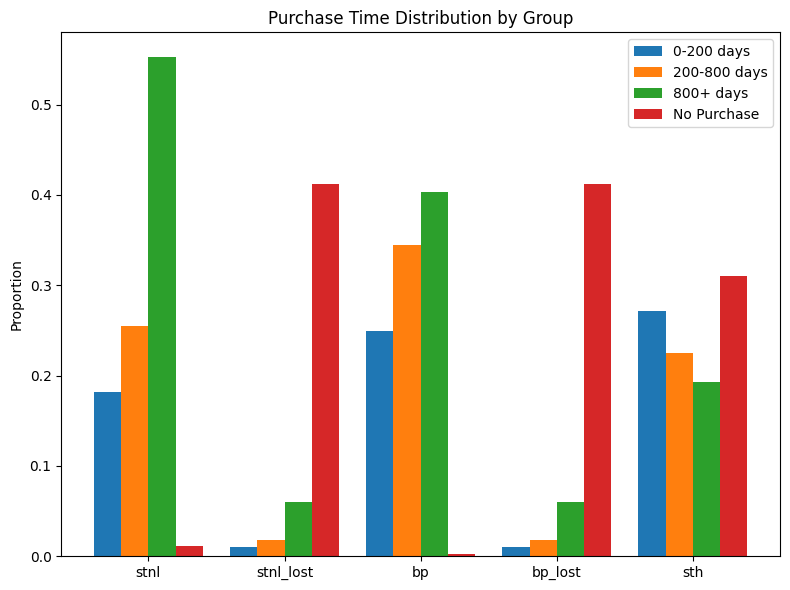

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated data with five groups: stnl, stnl_lost, bp, bp_lost, sth.
data = {
    'Group': ['bp', 'bp_lost', 'sth', 'stnl', 'stnl_lost'],
    'AVG_TIME_DAYS_purchase': [280.282086, 194.952263, 212.291176, 254.870609, 194.952263],
    '0-200_purchase': [0.249333, 0.010038, 0.271805, 0.181750, 0.010038],
    '200-800_purchase': [0.344667, 0.018034, 0.225152, 0.255083, 0.018034],
    '800+_purchase': [0.403333, 0.059525, 0.192698, 0.552417, 0.059525],
    'no_purchase': [0.002667, 0.412404, 0.310345, 0.010750, 0.412404],
}

# Create a DataFrame and set the group names as the index
purchase_df = pd.DataFrame(data).set_index('Group')

# Reorder the DataFrame to the desired order: stnl, stnl_lost, bp, bp_lost, sth
desired_order = ['stnl', 'stnl_lost', 'bp', 'bp_lost', 'sth']
purchase_df = purchase_df.reindex(desired_order)

# Print the summary table (raw purchase proportions)
summary = purchase_df[['AVG_TIME_DAYS_purchase', '0-200_purchase', '200-800_purchase', '800+_purchase', 'no_purchase']]
print("Purchase Data Analysis Summary:")
print(summary)

# --- Plotting the raw purchase distributions ---
fig, ax = plt.subplots(figsize=(8, 6))
groups = purchase_df.index.tolist()
x = range(len(groups))
width = 0.2

# Plot bars for each purchase bucket and no_purchase
ax.bar([i - 1.5*width for i in x], purchase_df['0-200_purchase'], width=width, label='0-200 days')
ax.bar([i - 0.5*width for i in x], purchase_df['200-800_purchase'], width=width, label='200-800 days')
ax.bar([i + 0.5*width for i in x], purchase_df['800+_purchase'], width=width, label='800+ days')
ax.bar([i + 1.5*width for i in x], purchase_df['no_purchase'], width=width, label='No Purchase')

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_ylabel('Proportion')
ax.set_title('Purchase Time Distribution by Group')
ax.legend()
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import os

# Directory path where the CSV files are located
directory = "C:/Users/cdub4/Downloads/"

# List of lost CSV filenames
lost_files = [
    "lost1_without_sth_bucket.csv",
    "lost2_without_sth_bucket.csv",
    "lost3_without_sth_bucket.csv",
    "lost4_without_sth_bucket.csv",
    "lost5_without_sth_bucket.csv"
]

# Loop through each lost file, read it, and print its columns
for file in lost_files:
    filepath = os.path.join(directory, file)
    df = pd.read_csv(filepath)
    print(f"Columns for {file}:")
    print(df.columns.tolist())
    print("-" * 50)


Columns for lost1_without_sth_bucket.csv:
['CUSTOMER_KEY', 'year', 'month', 'LOB_SEAHAWKS', 'LOB_FGI', 'email_click', 'email_incoming_from_customer', 'email_open', 'email_outgoing_to_customer', 'email_send', 'email_sub', 'email_unsub', 'form_submission', 'forward_received', 'forward_send', 'initial_creation', 'merch_purchase', 'page_view', 'phonecall_incoming_from_customer', 'phonecall_outgoing_to_customer', 'primary_purchase_club', 'primary_purchase_ga', 'primary_purchase_single', 'primary_purchase_suite', 'secondary_purchase', 'secondary_sale', 'survey_submission', 'text_incoming_from_customer', 'text_outgoing_to_customer', 'Totals', 'CAMPAIGN_LOST', 'AVG_TIME_DAYS_purchase', '0-200_purchase', '200-800_purchase', '800+_purchase', 'no_purchase', 'percent_open', 'percent_click']
--------------------------------------------------
Columns for lost2_without_sth_bucket.csv:
['CUSTOMER_KEY', 'year', 'month', 'LOB_SEAHAWKS', 'LOB_FGI', 'email_click', 'email_incoming_from_customer', 'email_op

Purchase Data Analysis Summary:
           AVG_TIME_DAYS_purchase  0-200_purchase  200-800_purchase  \
Group                                                                 
stnl                   254.870609        0.181750          0.255083   
lost_stnl              190.000000        0.016000          0.032000   
bp                     280.282086        0.249333          0.344667   
lost_bp                200.000000        0.024000          0.044000   
sth                    212.291176        0.271805          0.225152   

           800+_purchase  no_purchase  
Group                                  
stnl            0.552417     0.010750  
lost_stnl       0.112000     0.840000  
bp              0.403333     0.002667  
lost_bp         0.122000     0.810000  
sth             0.192698     0.310345  


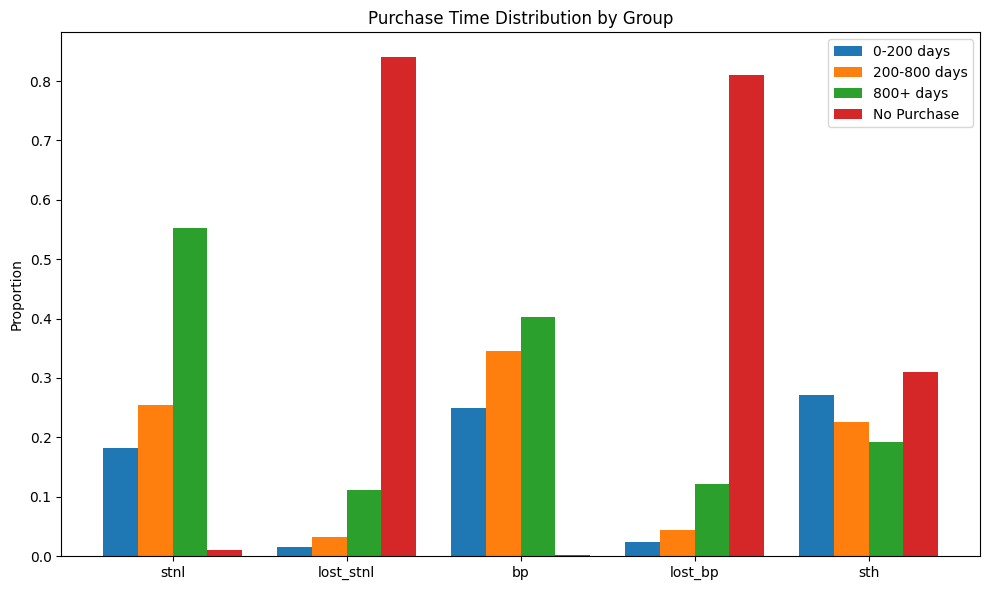

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated data for five groups:
# Note: The purchase proportions (0-200, 200-800, 800+) plus no_purchase must sum to 1.
data = {
    'Group': ['stnl', 'lost_stnl', 'bp', 'lost_bp', 'sth'],
    'AVG_TIME_DAYS_purchase': [254.870609, 190.0, 280.282086, 200.0, 212.291176],
    '0-200_purchase':       [0.181750, 0.016,   0.249333,  0.024,   0.271805],
    '200-800_purchase':     [0.255083, 0.032,   0.344667,  0.044,   0.225152],
    '800+_purchase':        [0.552417, 0.112,   0.403333,  0.122,   0.192698],
    'no_purchase':          [0.010750, 0.840,   0.002667,  0.810,   0.310345]
}

# Create the DataFrame and set the group names as the index
purchase_df = pd.DataFrame(data).set_index('Group')
print("Purchase Data Analysis Summary:")
print(purchase_df)

# --- Plotting the raw purchase distributions ---
fig, ax = plt.subplots(figsize=(10, 6))
groups = purchase_df.index.tolist()
x = range(len(groups))
width = 0.2

# Plot one set of bars for each purchase bucket and for no_purchase
ax.bar([i - 1.5*width for i in x], purchase_df['0-200_purchase'], width=width, label='0-200 days')
ax.bar([i - 0.5*width for i in x], purchase_df['200-800_purchase'], width=width, label='200-800 days')
ax.bar([i + 0.5*width for i in x], purchase_df['800+_purchase'], width=width, label='800+ days')
ax.bar([i + 1.5*width for i in x], purchase_df['no_purchase'], width=width, label='No Purchase')

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_ylabel('Proportion')
ax.set_title('Purchase Time Distribution by Group')
ax.legend()
plt.tight_layout()
plt.show()


C:\Users\cdub4\AppData\Local\Temp\ipykernel_23644\222518053.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = lost_df.groupby(['engagement_bin', 'purchase_flag']).size().unstack(fill_value=0)


Binned Summary by Engagement and Purchase Flag:
purchase_flag   No Purchase  Purchase
engagement_bin                       
Low                   15621      1063
Medium                12635      2105
High                   9912      4939


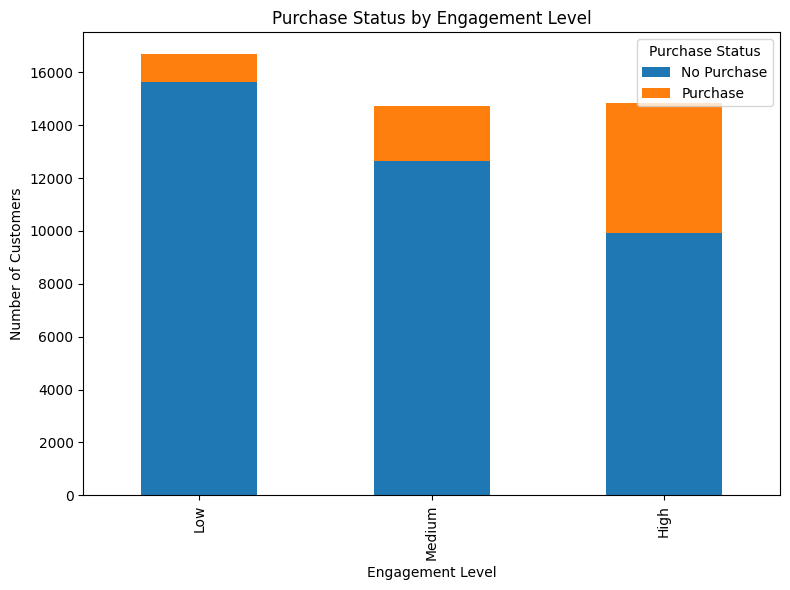

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the engagement columns
engagement_cols = ['email_click', 'email_open', 'page_view', 'form_submission']

# Ensure missing values are filled
lost_df[engagement_cols] = lost_df[engagement_cols].fillna(0)

# Create an overall engagement score (simple sum of the chosen metrics)
lost_df['engagement_score'] = lost_df[engagement_cols].sum(axis=1)

# Bin the engagement score into 3 groups (Low, Medium, High) using quantiles
lost_df['engagement_bin'] = pd.qcut(lost_df['engagement_score'], q=3, labels=["Low", "Medium", "High"])

# Define the purchase columns
purchase_cols = ['0-200_purchase', '200-800_purchase', '800+_purchase']

# Ensure missing purchase values are filled
lost_df[purchase_cols] = lost_df[purchase_cols].fillna(0)

# Create a purchase flag: if any purchase bucket > 0 then "Purchase", otherwise "No Purchase"
lost_df['purchase_sum'] = lost_df[purchase_cols].sum(axis=1)
lost_df['purchase_flag'] = lost_df['purchase_sum'].apply(lambda x: 'Purchase' if x > 0 else 'No Purchase')

# Group by engagement bin and purchase flag, and count the number of records in each bin
bin_summary = lost_df.groupby(['engagement_bin', 'purchase_flag']).size().unstack(fill_value=0)
print("Binned Summary by Engagement and Purchase Flag:")
print(bin_summary)

# Plot a stacked bar chart
bin_summary.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel("Engagement Level")
plt.ylabel("Number of Customers")
plt.title("Purchase Status by Engagement Level")
plt.legend(title="Purchase Status")
plt.tight_layout()
plt.show()


Lost List: high engagement: more purchases

c:\Users\cdub4\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\cdub4\AppData\Local\Temp\ipykernel_23644\2863147789.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = lost_df.groupby(['open_bin', 'purchase_flag']).size().unstack(fill_value=0)


Binned Summary by Percent Open and Purchase Flag:
purchase_flag  No Purchase  Purchase
open_bin                            
Low                  14033      1394
Medium               12645      2782
High                 11490      3931


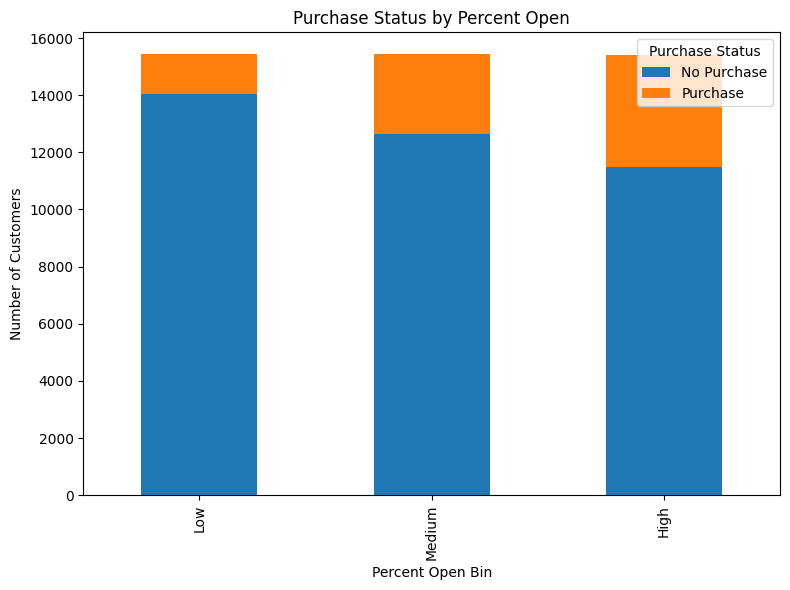

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the percent_open column is numeric and fill any missing values with 0
lost_df['percent_open'] = pd.to_numeric(lost_df['percent_open'], errors='coerce').fillna(0)

# Bin on percent_open into three quantile-based bins: Low, Medium, High
lost_df['open_bin'] = pd.qcut(lost_df['percent_open'], q=3, labels=['Low', 'Medium', 'High'])

# Define purchase columns (adjust these if needed)
purchase_cols = ['0-200_purchase', '200-800_purchase', '800+_purchase']

# Fill missing values in purchase columns with 0
lost_df[purchase_cols] = lost_df[purchase_cols].fillna(0)

# Create a purchase flag: if the sum of purchase columns is > 0, mark as "Purchase", else "No Purchase"
lost_df['purchase_sum'] = lost_df[purchase_cols].sum(axis=1)
lost_df['purchase_flag'] = lost_df['purchase_sum'].apply(lambda x: 'Purchase' if x > 0 else 'No Purchase')

# Group the data by the open_bin and purchase_flag, then count the number of records in each group
bin_summary = lost_df.groupby(['open_bin', 'purchase_flag']).size().unstack(fill_value=0)
print("Binned Summary by Percent Open and Purchase Flag:")
print(bin_summary)

# Plot a stacked bar chart
bin_summary.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel("Percent Open Bin")
plt.ylabel("Number of Customers")
plt.title("Purchase Status by Percent Open")
plt.legend(title="Purchase Status")
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Assume lost_df already exists and has the necessary columns, including purchase_flag.

# --- Define target variable ---
lost_df['target'] = lost_df['purchase_flag'].apply(lambda x: 1 if x == 'Purchase' else 0)

# --- Select features ---
features = ['email_open', 'email_click', 'page_view', 'form_submission', 'percent_open']
X = lost_df[features].copy()

# --- Preprocess: fill missing values and replace infinities ---
X.fillna(0, inplace=True)
X.replace([np.inf, -np.inf], 0, inplace=True)  # or choose a more meaningful value if needed

y = lost_df['target']

# --- Scale features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# --- Train logistic regression model ---
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# --- Evaluate the model ---
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     11464
           1       0.67      0.16      0.25      2419

    accuracy                           0.84     13883
   macro avg       0.76      0.57      0.58     13883
weighted avg       0.82      0.84      0.80     13883

ROC AUC Score: 0.7634543977126879


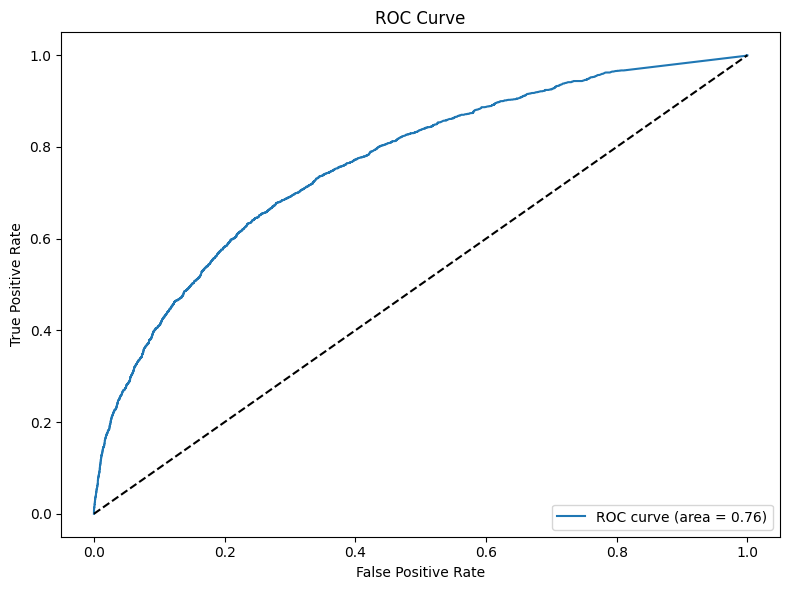

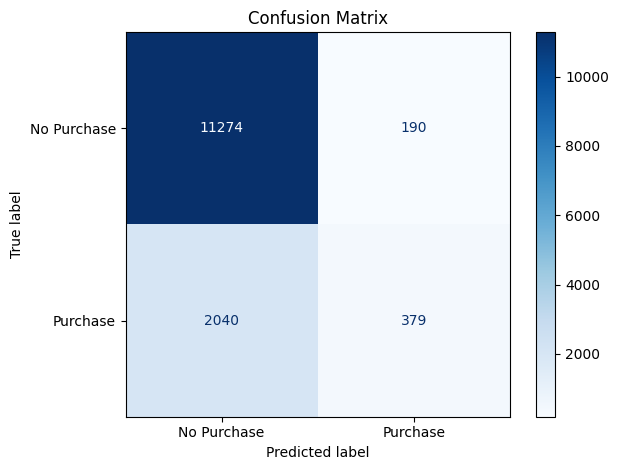

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Purchase', 'Purchase'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
